### 의사결정 나무(Decision Tree)
: 데이터의 분류 및 회귀에 사용되는 지도학습 알고리즘

- 서울지역(구)의 경도와 위도정보를 사용하여 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [18]:
import pandas as pd

In [19]:
train_df = pd.read_csv('../Data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [20]:
test_df = pd.read_csv('../Data/seoul_dong.csv')
test_df.head()


,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [21]:
# train_df의 label 갯수 확인(빈도수)
train_df['label'].value_counts()

label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

In [22]:
# test_df의 label 갯수 확인(빈도수)
test_df['label'].value_counts()


label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

> 의사결정 나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필요 없음

---
### 현 데이터의 경도와 위도에 따른 분류를 시각화

In [23]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


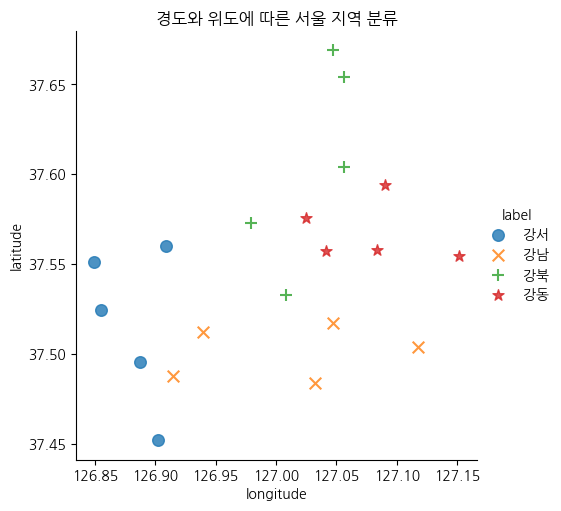

In [24]:
# 경도와 위도에 따른 데이터 시각화
sns.lmplot(
    x='longitude',
    y='latitude',
    data=train_df,
    fit_reg=False,
    scatter_kws={'s':70},
    hue='label',
    markers=['o','x','+','*']
)

plt.title('경도와 위도에 따른 서울 지역 분류')
plt.show()


### 데이터 다듬기
- 학습 및 테스트에 필요없는 feature를 제거
- 구이름 및 동이름은 학습 및 테스트에 필요없으므로 제거

In [25]:
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [26]:
train_df.drop(
    ['district'],
    axis='columns',
    inplace=True
)

train_df.head()


,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서


In [27]:
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [28]:
test_df.drop(
    ['dong'],
    axis='columns',
    inplace=True
)

test_df.head()




,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


In [31]:
# Train과 Target 만들기
x_train = train_df[['longitude', 'latitude']]
y_train = train_df['label']

# Test과 Target 만들기
x_test = test_df[['longitude', 'latitude']]
y_test = test_df['label']

print(x_train.head())
print(y_train.head())
print('--------------------------------')
print(x_test.head())
print(y_test.head())

    longitude   latitude
0  126.849500  37.551000
1  126.855396  37.524240
2  126.887400  37.495400
3  126.902000  37.451900
4  126.908728  37.560229
0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object
--------------------------------
    longitude   latitude
0  126.854547  37.489853
1  126.859245  37.501394
2  126.847951  37.537759
3  126.815719  37.575817
4  126.891620  37.577039
0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object


### 의사결정나무

In [32]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [33]:
# 학습시키기
clf = DecisionTreeClassifier(
    random_state=35,
).fit(x_train, y_train)

In [34]:
# tree의 시각화
from sklearn.tree import plot_tree

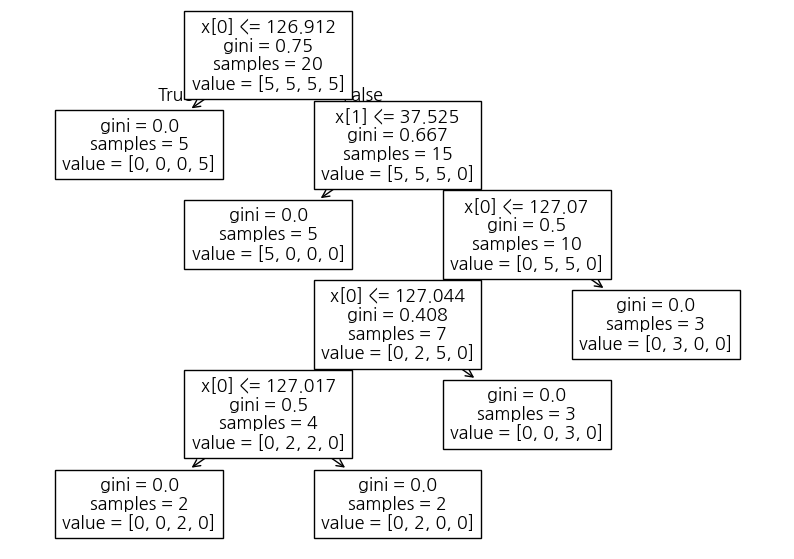

In [35]:
plt.figure(figsize=(10,7))
plot_tree(clf)
plt.show()

In [36]:
# 테스트
from sklearn.metrics import accuracy_score

In [37]:
pred = clf.predict(x_test)
pred

array(['강서', '강서', '강서', '강서', '강서', '강남', '강남', '강남', '강남', '강남', '강북',
       '강북', '강동', '강북', '강북', '강동', '강동', '강동', '강동', '강동'], dtype=object)

In [38]:
accuracy_score(y_test, pred)

0.95

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [40]:
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

array([[5, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

> 결과값의 정렬은 오름차순

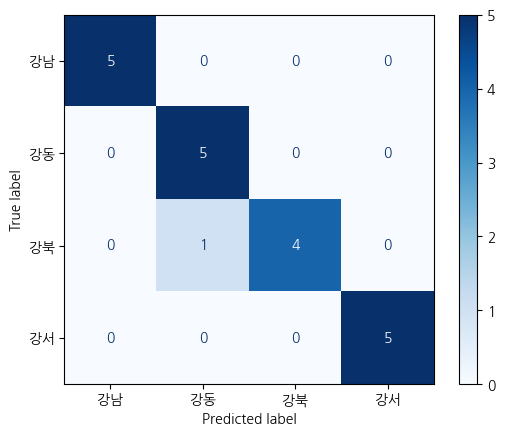

In [42]:
target_name = ['강남', '강동', '강북', '강서']
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.Blues, 
)
plt.show()



> 강북인데 강동으로 잘못 분류된 것이 하나 있음
